In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"medical_examination.csv")

df['overweight'] = (round(df['weight'] / (df['height'] / 100) ** 2, 1) > 25).replace({True: 1, False: 0})

# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x:0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x:0 if x == 1 else 1)

# Draw Categorical Plot
def draw_cat_plot():
    df_cat = pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])
    
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
    
    fig = sns.catplot(
        data=df_cat,
        x='variable',
        y='total', 
        hue='value',
        col='cardio',
        kind='bar',
        )
    return fig


# Draw Heat Map
def draw_heat_map():
    df_heat = df.loc[(df['ap_lo'] <= df['ap_hi']) & 
                     (df['height'] >= df['height'].quantile(0.025)) &
                     (df['weight'] >= df['weight'].quantile(0.025))]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(df.corr()))

    fig, ax = plt.subplots(figsize=(11, 9))

    sns.heatmap(corr,
                mask=mask,
                vmax=.3,
                center=0,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .5}
               )
    return fig


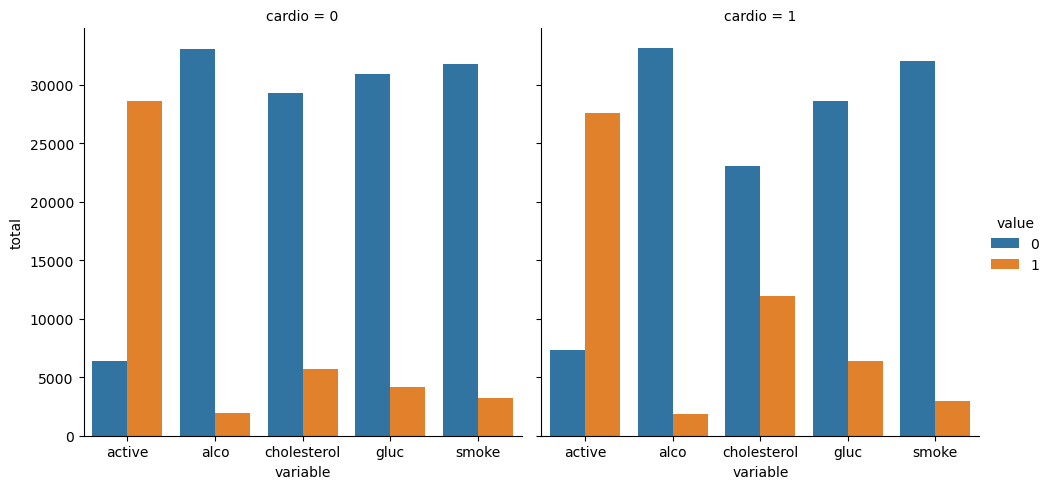

In [2]:
draw_cat_plot()

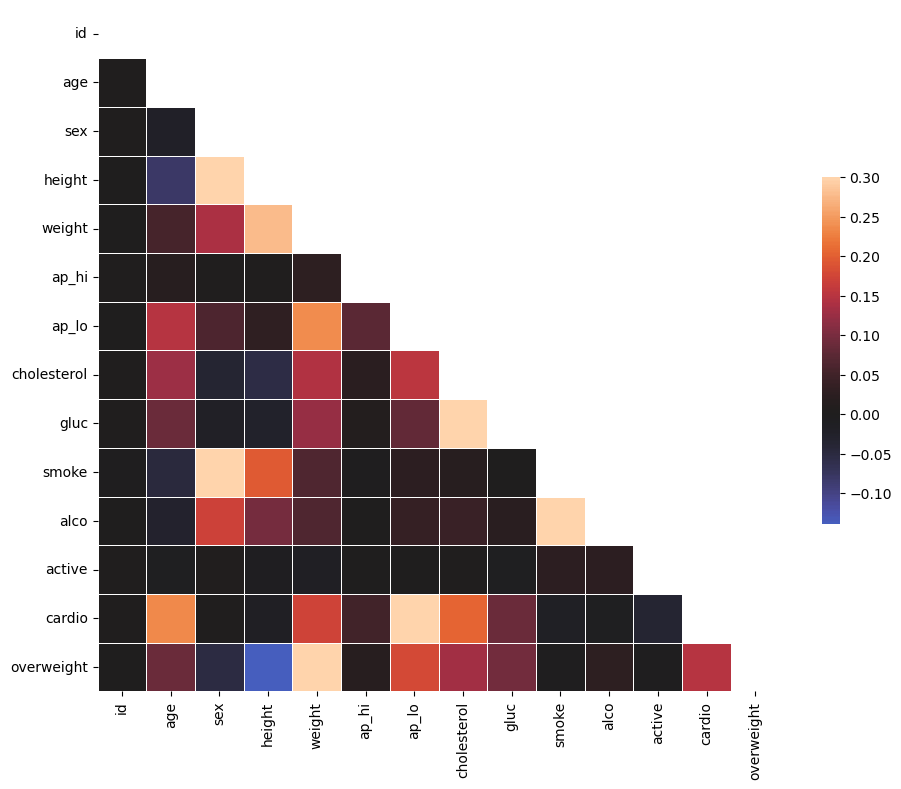

In [3]:
draw_heat_map()